<a href="https://colab.research.google.com/github/Alialtinel/aalto_summer24_project/blob/main/notebooks/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import userdata
access_token = userdata.get('key here')

In [3]:
!git clone https://{acces_token}@github.com/Alialtinel/aalto_summer24_project.git

fatal: destination path 'aalto_summer24_project' already exists and is not an empty directory.


In [4]:
%cd aalto_summer24_project

/content/aalto_summer24_project


In [5]:
!git pull

Already up to date.


In [6]:
df_2015 = pd.read_excel('/content/aalto_summer24_project/data/french_poverty_urban_areas_2015.xlsx')
df_2016 = pd.read_excel('/content/aalto_summer24_project/data/french_poverty_urban_areas_2016.xlsx')
df_2017 = pd.read_excel('/content/aalto_summer24_project/data/french_poverty_urban_areas_2017.xlsx')
display(df_2015.head(2))
display(df_2016.head(2))
display(df_2017.head(2))

,CODGEO,LIBGEO,NBMENFISC,NBPERSMENFISC,MED,PIMP,TP60,TP60AGE1,TP60AGE2,TP60AGE3,...,PPEN,PPAT,PPSOC,PPFAM,PPMINI,PPLOGT,PIMPOT,D1,D9,RD
0,001,Paris,5043205,12424813.5,22629.649123,66.0,15.6,19.4,16.7,17.9,...,21.6,11.4,4.3,1.9,1.2,1.2,-21.8,10319.130435,45962.666667,4.454122
1,002,Lyon,932394,2226982.5,21844.000000,60.2,13.0,19.6,14.9,15.1,...,24.4,11.1,5.1,2.3,1.4,1.4,-18.1,11299.333333,39649.677419,3.509028


,CODGEO,LIBGEO,NBMENFISC,NBPERSMENFISC,MED,PIMP,TP60,TP60AGE1,TP60AGE2,TP60AGE3,...,PPEN,PPAT,PPSOC,PPFAM,PPMINI,PPLOGT,PIMPOT,D1,D9,RD
0,001,Paris,5061769,12363243.5,22894.500000,63.8,15.4,19.0,16.3,17.7,...,21.7,10.7,4.4,1.9,1.4,1.1,-22.0,10552.00000,46262.000000,4.384193
1,002,Lyon,939936,2230753.0,22118.809524,57.1,12.9,19.5,14.6,15.1,...,24.5,10.3,5.2,2.3,1.5,1.3,-18.0,11489.52381,40028.571429,3.483919


,CODGEO,LIBGEO,NBMENFISC,NBPERSMENFISC,MED,PIMP,TP60,TP60AGE1,TP60AGE2,TP60AGE3,...,PPEN,PPAT,PPSOC,PPFAM,PPMINI,PPLOGT,PIMPOT,D1,D9,RD
0,001,Paris,5087511,12372835,23210,63.8,15.0,18.8,15.9,17.1,...,21.5,10.5,4.5,1.9,1.5,1.1,-22.0,10870,46980,4.3
1,002,Lyon,947330,2236788,22510,57.3,12.7,19.9,14.2,14.8,...,24.3,10.2,5.2,2.3,1.6,1.3,-18.1,11720,40650,3.5


In [7]:
display(df_2015.shape)
display(df_2016.shape)
display(df_2017.shape)


(782, 29)

(781, 29)

(781, 29)

In [8]:
# Rename columns in df_2017 before merging
rename_columns_2017 = {col: f"{col}_2017" for col in df_2017.columns if col != 'CODGEO'}
df_2017_renamed = df_2017.rename(columns=rename_columns_2017)

# Perform the merge operations
df_merged = df_2015.merge(df_2016,
                          on='CODGEO',
                          how='inner',
                          suffixes=('_2015', '_2016')).merge(df_2017_renamed,
                                                             on='CODGEO',
                                                             how='inner')


In [9]:
df_merged.columns

Index(['CODGEO', 'LIBGEO_2015', 'NBMENFISC_2015', 'NBPERSMENFISC_2015',
       'MED_2015', 'PIMP_2015', 'TP60_2015', 'TP60AGE1_2015', 'TP60AGE2_2015',
       'TP60AGE3_2015', 'TP60AGE4_2015', 'TP60AGE5_2015', 'TP60AGE6_2015',
       'TP60TOL1_2015', 'TP60TOL2_2015', 'PACT_2015', 'PTSA_2015', 'PCHO_2015',
       'PBEN_2015', 'PPEN_2015', 'PPAT_2015', 'PPSOC_2015', 'PPFAM_2015',
       'PPMINI_2015', 'PPLOGT_2015', 'PIMPOT_2015', 'D1_2015', 'D9_2015',
       'RD_2015', 'LIBGEO_2016', 'NBMENFISC_2016', 'NBPERSMENFISC_2016',
       'MED_2016', 'PIMP_2016', 'TP60_2016', 'TP60AGE1_2016', 'TP60AGE2_2016',
       'TP60AGE3_2016', 'TP60AGE4_2016', 'TP60AGE5_2016', 'TP60AGE6_2016',
       'TP60TOL1_2016', 'TP60TOL2_2016', 'PACT_2016', 'PTSA_2016', 'PCHO_2016',
       'PBEN_2016', 'PPEN_2016', 'PPAT_2016', 'PPSOC_2016', 'PPFAM_2016',
       'PPMINI_2016', 'PPLOGT_2016', 'PIMPOT_2016', 'D1_2016', 'D9_2016',
       'RD_2016', 'LIBGEO_2017', 'NBMENFISC_2017', 'NBPERSMENFISC_2017',
       'MED_2017',

In [10]:
X_columns = [ 'NBMENFISC', 'NBPERSMENFISC', 'MED', 'PIMP', 'TP60',
       'TP60AGE1', 'TP60AGE2', 'TP60AGE3', 'TP60AGE4', 'TP60AGE5', 'TP60AGE6',
       'TP60TOL1', 'TP60TOL2', 'PACT', 'PTSA', 'PCHO', 'PBEN', 'PPEN', 'PPAT',
       'PPSOC', 'PPFAM', 'PPMINI', 'PPLOGT', 'PIMPOT', 'D1', 'D9', 'RD']

In [25]:
column_mapping = pd.read_excel('/content/aalto_summer24_project/data/french_poverty_urban_areas_column_mapping.xlsx')
column_mapping.head(2)
column_mapping.set_index('column code', inplace=True)


'Geographic Code'

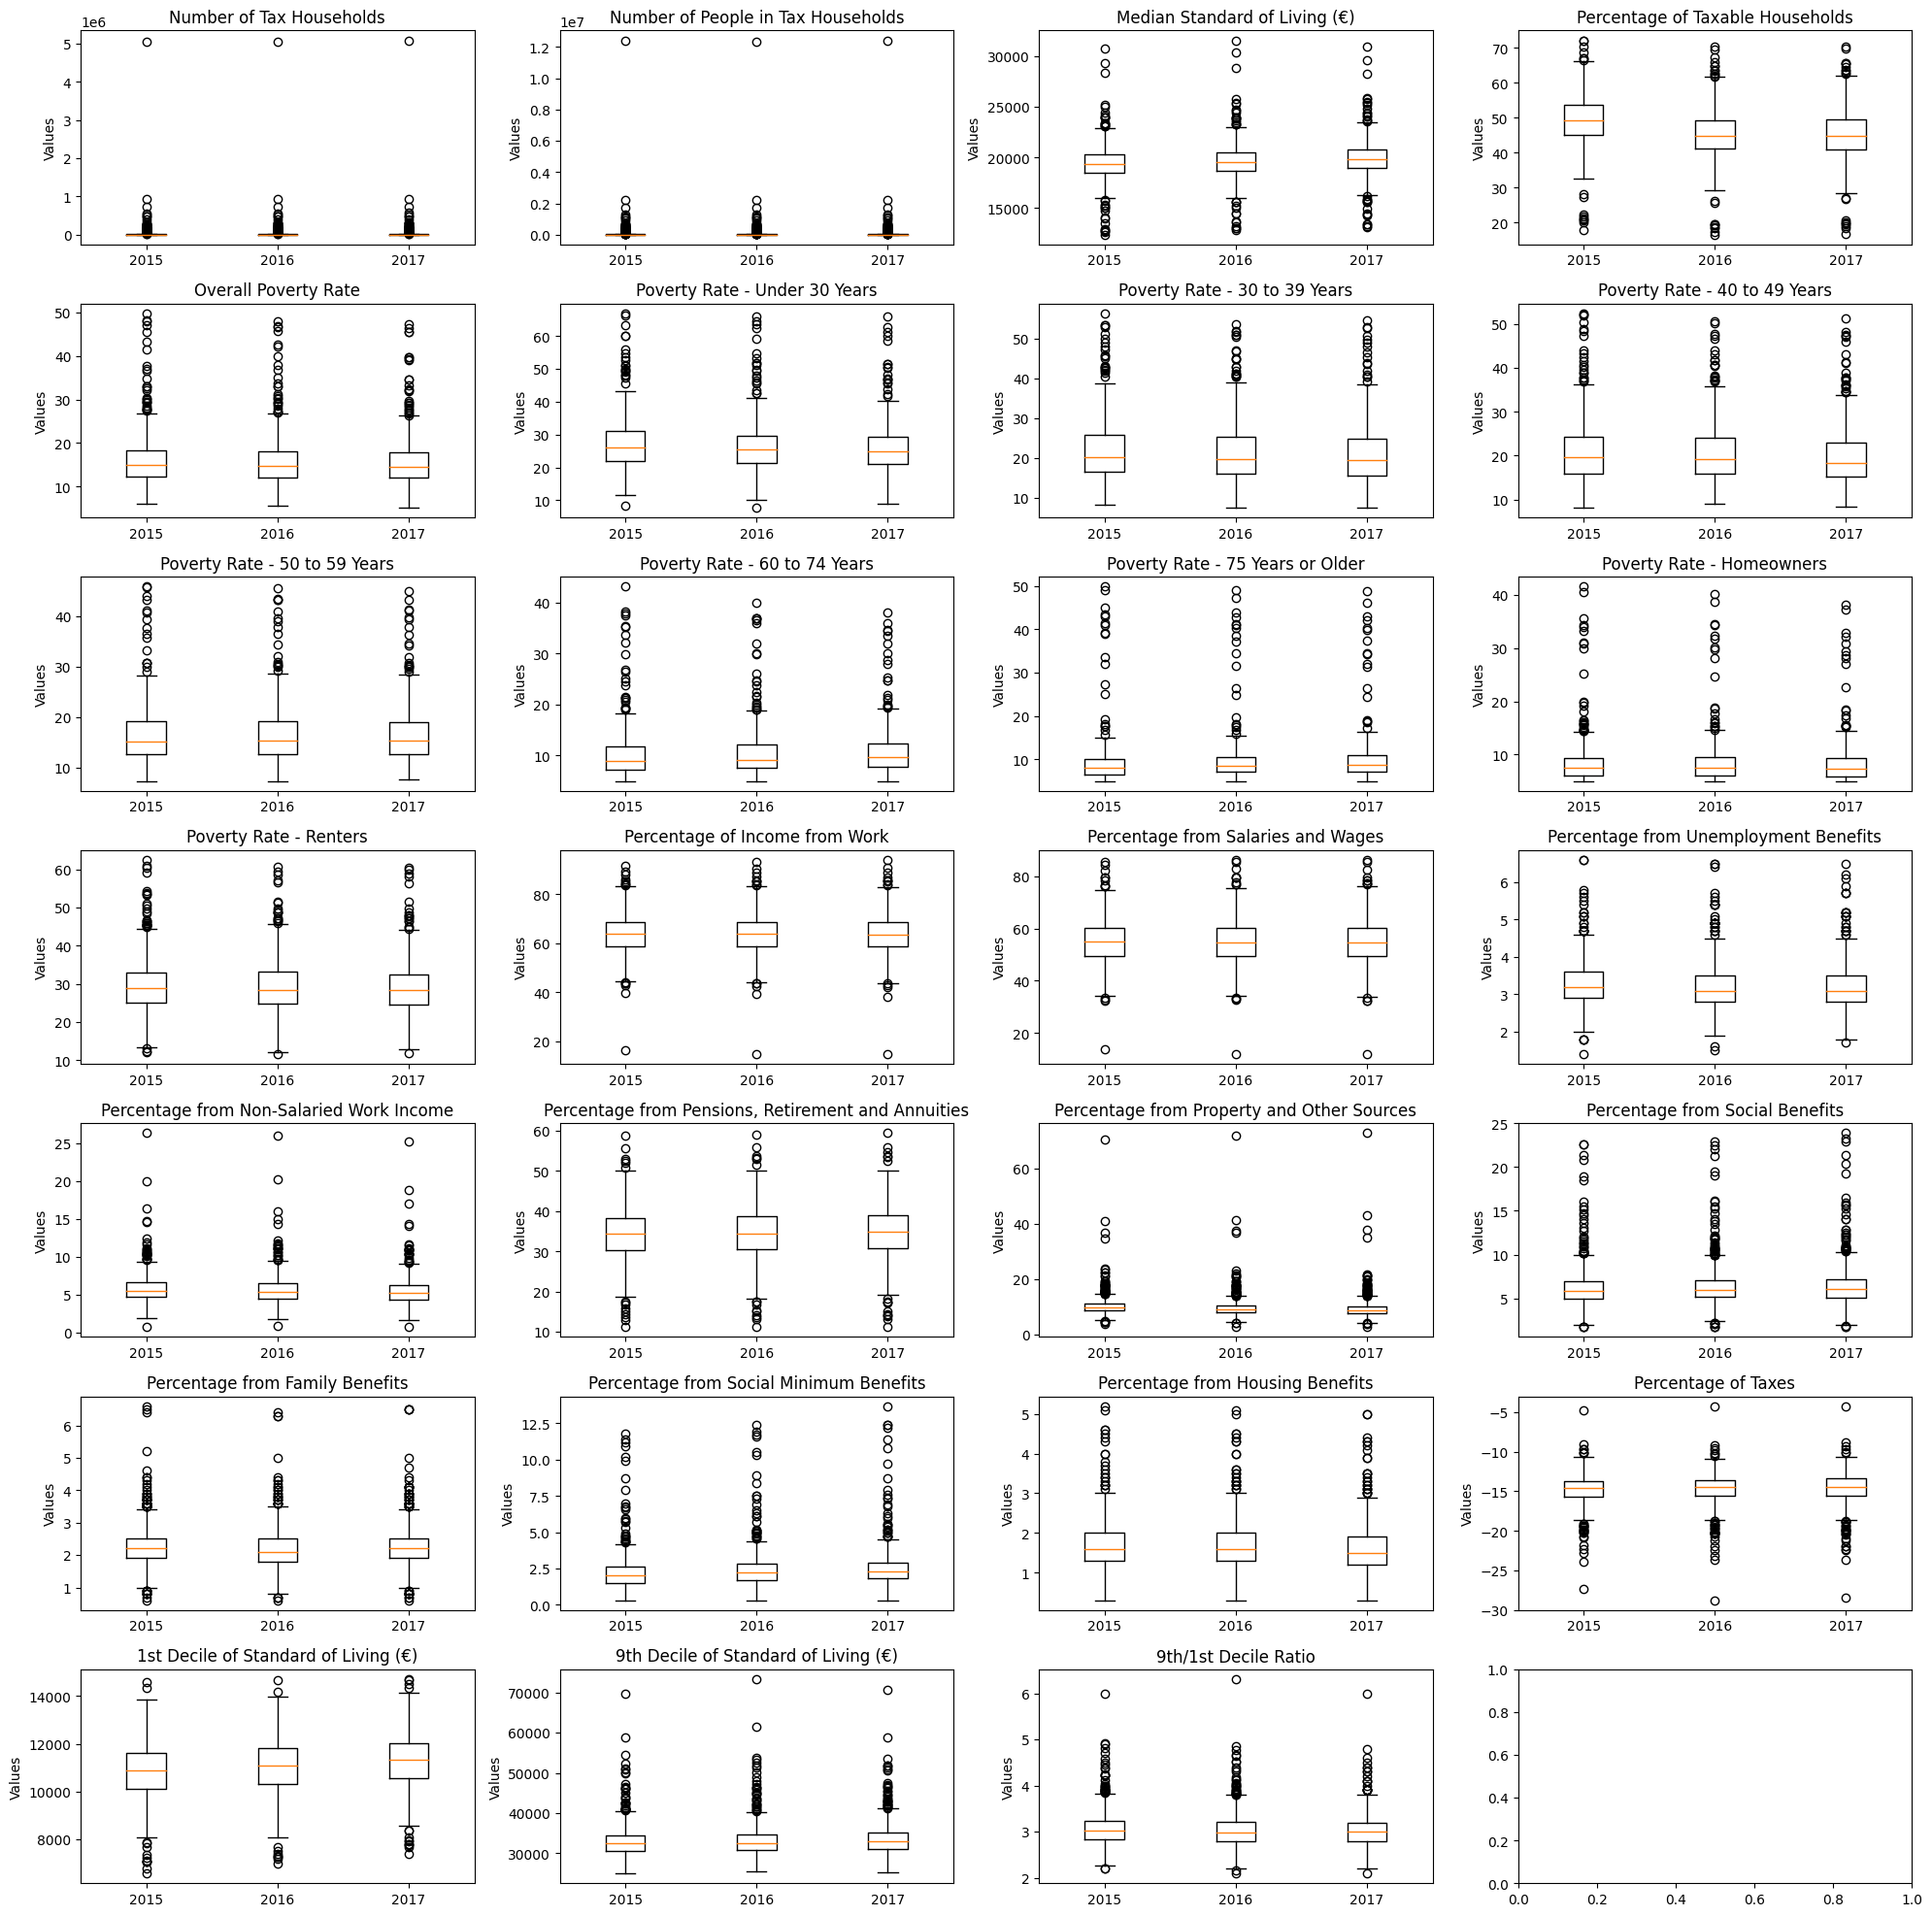

In [27]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(7, 4, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through columns and create box plots
for i, col in enumerate(X_columns):
  data_2015 = df_merged[col + '_2015'].dropna()
  data_2016 = df_merged[col + '_2016'].dropna()
  data_2017 = df_merged[col + '_2017'].dropna()

  axes[i].boxplot([data_2015, data_2016, data_2017], labels=['2015', '2016', '2017'])
  axes[i].set_title(column_mapping.loc[col].values[0])
  axes[i].set_ylabel('Values')

fig.savefig('/content/aalto_summer24_project/visualizations/change_in_years_boxplots.png')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [12]:
# Calculate percentage change in RD values
df_merged['RD_change_2015_2016'] = (df_merged['RD_2016'] - df_merged['RD_2015']) / df_merged['RD_2015'] * 100
df_merged['RD_change_2016_2017'] = (df_merged['RD_2017'] - df_merged['RD_2016']) / df_merged['RD_2016'] * 100
df_merged['RD_change_2015_2017'] = (df_merged['RD_2017'] - df_merged['RD_2015']) / df_merged['RD_2016'] * 100

# Print or visualize the percentage changes
display(df_merged[['CODGEO', 'RD_change_2015_2016', 'RD_change_2016_2017', 'RD_change_2015_2017']])

,CODGEO,RD_change_2015_2016,RD_change_2016_2017,RD_change_2015_2017
0,001,-1.569995,-1.920367,-3.515404
1,002,-0.715552,0.461575,-0.259134
2,003,-1.590614,-2.404473,-4.020797
3,004,-1.611939,-0.452483,-2.090831
4,005,-1.569781,0.252619,-1.342197
...,...,...,...,...
776,9D3,-4.244914,-4.691682,-9.124777
777,9D4,-3.008260,-4.652314,-7.753877
778,9D5,-3.640417,-4.125401,-7.903351
779,9D6,-4.269657,-3.388129,-7.848217


In [13]:
# prompt: pd.read_csv('/content/aalto_summer24_project/data/filtered_data.csv')
# merge this with df_merged on CODGEO and add RD_CHANGE_2015_2017 to the df

df_filtered = pd.read_csv('/content/aalto_summer24_project/data/filtered_data.csv')
df_filtered = df_filtered.merge(df_merged[['CODGEO', 'RD_change_2015_2017']],
                                on='CODGEO', how='left')
display(df_filtered.head(2))

,LIBGEO,CODGEO,NBMENFISC,NBPERSMENFISC,MED,PIMP,TP60,TP60AGE1,TP60AGE2,TP60AGE3,...,PPFAM,PPMINI,PPLOGT,PIMPOT,D1,D9,RD,lat,lng,RD_change_2015_2017
0,Paris,001,5064161.67,12386964.00,22911.38,64.53,15.33,19.07,16.30,17.57,...,1.90,1.37,1.13,-21.93,10580.38,46401.56,4.38,48.8567,2.3522,-3.515404
1,Bordeaux,006,527937.00,1196274.67,21900.44,56.13,12.03,22.30,13.37,13.10,...,1.83,1.77,1.37,-17.77,11760.29,38424.44,3.28,44.8400,-0.5800,0.140834


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_filtered['RD_change_2015_2017_scaled'] = scaler.fit_transform(df_filtered[['RD_change_2015_2017']])

In [34]:
# Create the map for the new clusters
import plotly.express as px
import plotly.io as pio
fig_new = px.scatter_geo(
    df_filtered,
    lat='lat',
    lon='lng',
    size='RD_change_2015_2017_scaled',
    color='RD_change_2015_2017_scaled',
    hover_name='LIBGEO',
    projection="natural earth",
    scope='europe'
)
fig_new.update_geos(
    lataxis_range=[41, 51],
    lonaxis_range=[-5, 9]
)
fig_new.update_layout(
    title='RD change on Map '
)
fig_new.write_html("/content/aalto_summer24_project/visualizations/change_in_RD_years_geoplots.html")

fig_new.show()